In [1]:
# Celda 1: configuración e imports

%run ./00_template.py

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

LAYER_COMUNAS = "comunas_rm_censo"

# Capa de comunas (para mapas)
comunas = gpd.read_file(RUTA_GPKG, layer=LAYER_COMUNAS)

# Archivos procesados
indicadores_path = PROCESSED_DATA / "indicadores_servicios.csv"
accesibilidad_path = PROCESSED_DATA / "accesibilidad_servicios.csv"
desiertos_path = PROCESSED_DATA / "desiertos_servicios.csv"

indicadores = pd.read_csv(indicadores_path)
accesibilidad = pd.read_csv(accesibilidad_path)
desiertos = pd.read_csv(desiertos_path)

print("Notebook 05 – Síntesis de resultados")
print(f"Indicadores de oferta:     {indicadores_path}")
print(f"Métricas de accesibilidad: {accesibilidad_path}")
print(f"Desiertos de servicio:     {desiertos_path}")


=== Template PEP1 Desiertos cargado ===
BASE_DIR        : /home/jovyan
CARGA_DIR       : /home/jovyan/data/raw/Carga de datos
RUTA_GPKG       : /home/jovyan/data/raw/Carga de datos/geodatabase_proyecto.gpkg
RUTA_CENSO_CSV  : /home/jovyan/data/raw/Carga de datos/censo_RM_totales_comuna.csv
Notebook 05 – Síntesis de resultados
Indicadores de oferta:     /home/jovyan/data/processed/indicadores_servicios.csv
Métricas de accesibilidad: /home/jovyan/data/processed/accesibilidad_servicios.csv
Desiertos de servicio:     /home/jovyan/data/processed/desiertos_servicios.csv


In [2]:
# Celda 2: construir tabla maestra integrando oferta, accesibilidad y desiertos

columnas_clave = ["cod_comuna", "comuna", "poblacion"]

tabla = indicadores.merge(
    accesibilidad,
    on=columnas_clave,
    how="inner",
    suffixes=("_oferta", "_acceso"),
)

tabla = tabla.merge(
    desiertos[
        [c for c in desiertos.columns if c in columnas_clave or 
         c.startswith("score_desierto_") or 
         c.startswith("es_desierto_") or 
         c == "n_servicios_en_desierto"]
    ],
    on=columnas_clave,
    how="inner",
)

tabla.head()


,cod_comuna,comuna,poblacion,conteo_establecimientos_salud,conteo_establecimientos_educacion,conteo_establecimientos_educacion_superior,conteo_osm_supermercados,conteo_osm_almacenes_barrio,conteo_osm_bancos,conteo_ferias_libres,...,dist_min_supermercados_km,dist_min_almacenes_barrio_m,dist_min_almacenes_barrio_km,porc_cubierto_salud,porc_cubierto_supermercados,score_desierto_salud,es_desierto_salud,score_desierto_supermercados,es_desierto_supermercados,n_servicios_en_desierto
0,13502,Alhué,7768,6,5,0,0,0,0,0,...,40.794778,43798.753461,43.798753,2.674613,0.000000,2,1,3,1,2
1,13402,Buin,116969,21,49,3,0,0,0,3,...,12.426732,12554.492241,12.554492,20.410173,0.000000,0,0,3,1,1
2,13403,Calera de Tango,25491,4,14,0,5,6,2,4,...,0.899161,762.789718,0.762790,19.088371,9.371180,0,0,0,0,0
3,13102,Cerrillos,85041,10,33,2,8,24,10,6,...,1.496938,432.248382,0.432248,99.347926,50.458931,0,0,0,0,0
4,13103,Cerro Navia,127250,10,49,0,2,36,2,10,...,0.685052,337.028700,0.337029,99.587220,29.465187,1,0,1,0,0


In [3]:
# Celda 3: resumen estadístico simple del índice de desiertos

n_comunas = len(tabla)
promedio_desiertos = tabla["n_servicios_en_desierto"].mean()
max_desiertos = tabla["n_servicios_en_desierto"].max()
min_desiertos = tabla["n_servicios_en_desierto"].min()

print(f"Número de comunas analizadas: {n_comunas}")
print(f"Promedio de servicios en condición de desierto por comuna: {promedio_desiertos:.2f}")
print(f"Máximo de servicios en desierto en una comuna: {max_desiertos}")
print(f"Mínimo de servicios en desierto en una comuna: {min_desiertos}")


Número de comunas analizadas: 52
Promedio de servicios en condición de desierto por comuna: 0.46
Máximo de servicios en desierto en una comuna: 2
Mínimo de servicios en desierto en una comuna: 0


In [4]:
# Celda 4: top comunas con mayor número de servicios en desierto

top_desiertos = tabla[
    ["cod_comuna", "comuna", "poblacion", "n_servicios_en_desierto"]
].sort_values("n_servicios_en_desierto", ascending=False)

top_desiertos.head(15)


,cod_comuna,comuna,poblacion,n_servicios_en_desierto
0,13502,Alhué,7768,2
19,13302,Lampa,145160,2
49,13303,Tiltil,19742,2
45,13505,San Pedro,11108,2
43,13203,San José de Maipo,17441,2
5,13301,Colina,173293,2
33,13202,Pirque,29060,2
7,13503,Curacaví,35165,2
21,13115,Lo Barnechea,112620,2
29,13404,Paine,78828,1


In [5]:
# Celda 5: resumen de desiertos por servicio específico

columnas_servicios_bin = [c for c in tabla.columns if c.startswith("es_desierto_")]

resumen_servicios = {}
for col in columnas_servicios_bin:
    servicio = col.replace("es_desierto_", "")
    n_desiertos = tabla[col].sum()
    resumen_servicios[servicio] = {
        "n_comunas_en_desierto": int(n_desiertos),
        "porcentaje_comunas": float(n_desiertos) / len(tabla) * 100.0,
    }

pd.DataFrame(resumen_servicios).T


,n_comunas_en_desierto,porcentaje_comunas
salud,11.0,21.153846
supermercados,13.0,25.000000


💾 Figura guardada en: /home/jovyan/outputs/figures/sintesis_mapa_indice_desiertos.png


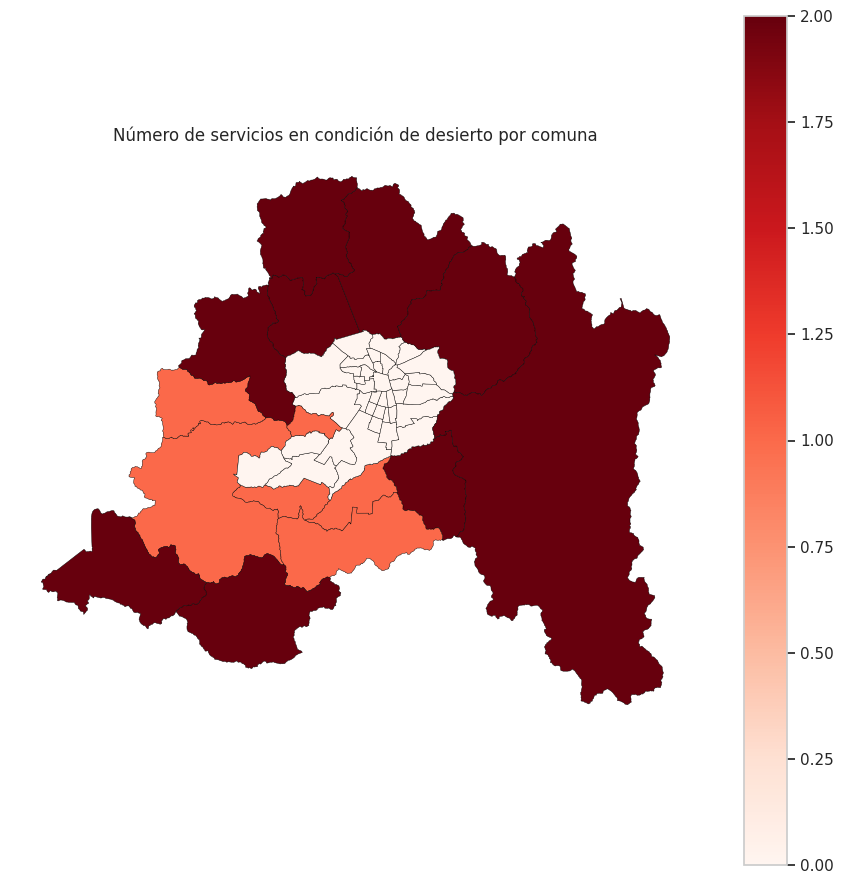

In [6]:
# Celda 6: mapa síntesis del número de servicios en desierto

comunas_map = comunas.merge(
    tabla[["cod_comuna", "n_servicios_en_desierto"]],
    left_on="CUT_COM",
    right_on="cod_comuna",
    how="left",
)

fig, ax = plt.subplots(figsize=(9, 9))

comunas_map.plot(
    column="n_servicios_en_desierto",
    ax=ax,
    legend=True,
    cmap="Reds",
    edgecolor="black",
    linewidth=0.3,
)

ax.set_title("Número de servicios en condición de desierto por comuna", fontsize=12)
ax.set_axis_off()

plt.tight_layout()
save_figure(fig, "sintesis_mapa_indice_desiertos")
plt.show()


💾 Figura guardada en: /home/jovyan/outputs/figures/sintesis_barra_top_desiertos.png


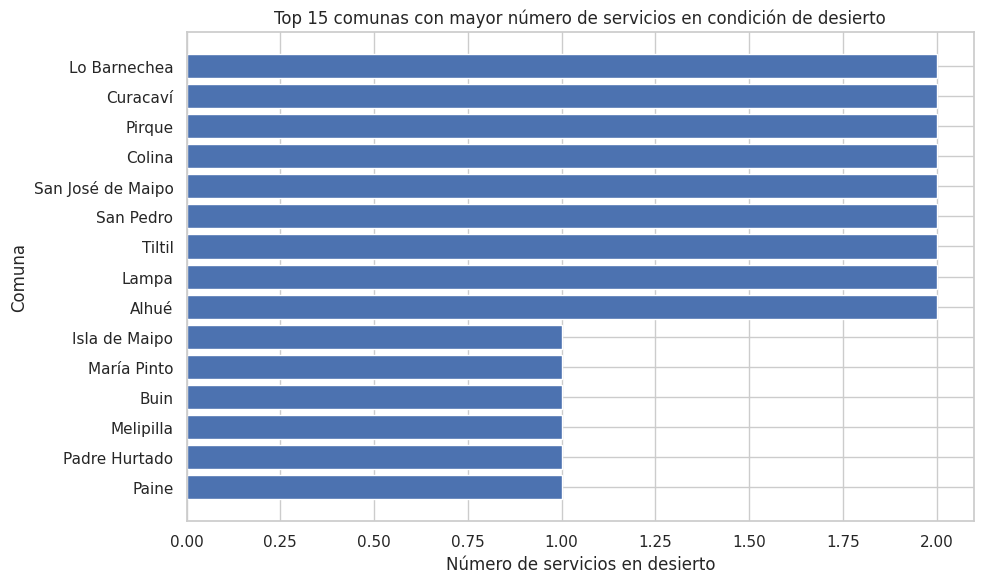

In [7]:
# Celda 7: gráfico de barras con comunas más críticas

top_n = 15
top_plot = top_desiertos.head(top_n).sort_values("n_servicios_en_desierto")

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    top_plot["comuna"],
    top_plot["n_servicios_en_desierto"],
)

ax.set_xlabel("Número de servicios en desierto")
ax.set_ylabel("Comuna")
ax.set_title(f"Top {top_n} comunas con mayor número de servicios en condición de desierto")

plt.tight_layout()
save_figure(fig, "sintesis_barra_top_desiertos")
plt.show()


In [8]:
# Celda 8: exportar tabla maestra a CSV para anexos

tabla_final_path = PROCESSED_DATA / "tabla_final_desiertos_servicios.csv"
tabla.to_csv(tabla_final_path, index=False)

print(f"Tabla final exportada a: {tabla_final_path}")


Tabla final exportada a: /home/jovyan/data/processed/tabla_final_desiertos_servicios.csv
